In [2]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score

In [5]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

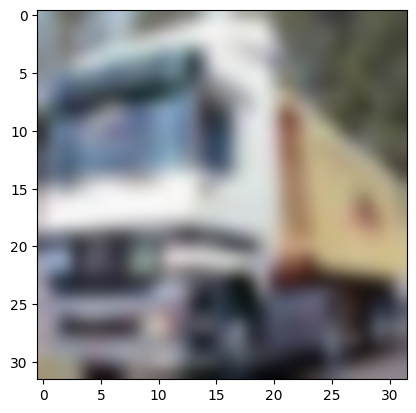

In [6]:
image = X_train[1]
plt.imshow(image, interpolation='bicubic')
plt.show()

In [7]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [8]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_train

In [10]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [12]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [13]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
modelo = Sequential()

modelo.add(Conv2D(32,(3,3), padding='same',activation='relu', input_shape=(32,32,3)))
modelo.add(Conv2D(32,(3,3), activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2,2)))
modelo.add(Dropout(0.25))

modelo.add(Conv2D(64,(3,3), padding='same',activation='relu'))
modelo.add(Conv2D(64,(3,3), activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2,2)))
modelo.add(Dropout(0.25))

modelo.add(Flatten())
modelo.add(Dense(512, activation='relu'))
modelo.add(Dropout(0.25))
modelo.add(Dense(10, activation='softmax'))

In [ ]:
modelo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
modelo.fit(X_train, y_train, batch_size=32, epochs=100)

In [19]:
previsoes = modelo.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [20]:
previsoes

array([[5.2874276e-07, 1.2501200e-06, 6.9122972e-05, ..., 1.8689641e-07,
        3.9670256e-05, 6.7904216e-07],
       [6.5305819e-09, 1.1997608e-01, 1.3840510e-28, ..., 4.8159556e-24,
        8.8002390e-01, 2.8378974e-08],
       [7.7819321e-03, 7.9245912e-04, 7.7299616e-09, ..., 6.5405843e-08,
        9.9138719e-01, 2.6353139e-06],
       ...,
       [1.0102723e-12, 5.4150800e-17, 7.7255482e-09, ..., 3.2149399e-07,
        6.2908331e-14, 1.3997218e-12],
       [3.3991724e-05, 9.9996567e-01, 1.5799421e-07, ..., 1.2086389e-08,
        2.6372124e-08, 1.3667237e-07],
       [1.4248997e-25, 1.9405692e-25, 3.5114235e-18, ..., 9.9999964e-01,
        3.4254537e-25, 2.1880785e-22]], dtype=float32)

In [21]:
previsoes_classes = np.argmax(previsoes, axis=1)
previsoes_classes

array([3, 8, 8, ..., 5, 1, 7])

In [22]:
y_test_classes = np.argmax(y_test, axis = 1)

In [23]:
y_test_classes

array([3, 8, 8, ..., 5, 1, 7])

In [24]:
accuracy = accuracy_score(y_test_classes,previsoes_classes)
accuracy

0.7779

In [25]:
confusion = confusion_matrix(y_test_classes,previsoes_classes)

In [26]:
confusion

array([[780,  11,  50,  33,  19,   8,  14,  17,  54,  14],
       [  9, 877,   3,  12,   6,   3,  13,   3,  29,  45],
       [ 53,   4, 671,  61,  70,  48,  55,  26,   9,   3],
       [ 11,   3,  57, 630,  57, 123,  66,  37,  12,   4],
       [ 11,   0,  52,  59, 740,  33,  42,  54,   6,   3],
       [  7,   1,  41, 166,  35, 682,  24,  38,   3,   3],
       [  3,   0,  31,  60,  20,  15, 857,   6,   7,   1],
       [ 10,   0,  17,  44,  49,  45,   9, 821,   4,   1],
       [ 35,  12,   7,  14,   7,   3,  10,   2, 893,  17],
       [ 18,  59,   8,  23,   3,   9,   3,  12,  37, 828]])